>>>on python 3.11.9

## Step0: Pre-reg

Since we use ipynb we can not directly use opencv methods to show frames we need to prepare a ipynb suitable frame shower.

In [32]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, clear_output
import time
import numpy as np

In [ ]:
# Load the video
video_path = "vidResources\\176kmShort.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")

else:
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get the frames per second of the video
    delay = 1 / fps  # Calculate the delay between frames

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break

        # Convert the frame from BGR to RGB for proper display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame
        clear_output(wait=True)  # Clear the previous frame
        display(Image.fromarray(frame_rgb))  # Display the current frame
        time.sleep(delay)  # Wait for the next frame
      

cap.release()


Video to Array 

In [14]:
def video2array(path:str):
    """return bgr format as it easier to use on opencv"""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Cannot open video.")
    else:
        frames = [] 
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        frames.append(frame)

    cap.release()
    return frames

In [24]:
def displayFromArray(source,limit=0):
    """lim 0 means unlimited if you give a value it stops at that lim"""
    limitCounter=0
    for frame in source:
        limitCounter+=1
        # Convert the frame from BGR to RGB for proper display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame
        clear_output(wait=True)  # Clear the previous frame
        display(Image.fromarray(frame_rgb))  # Display the current frame
        if limitCounter==limit: # if lim 0 it wont be work so limit 0 means unlimited
            break
       

In [17]:
video_path = "vidResources\\176kmShort.mp4"
testArray=video2array(video_path)
len(testArray)

End of video.


145

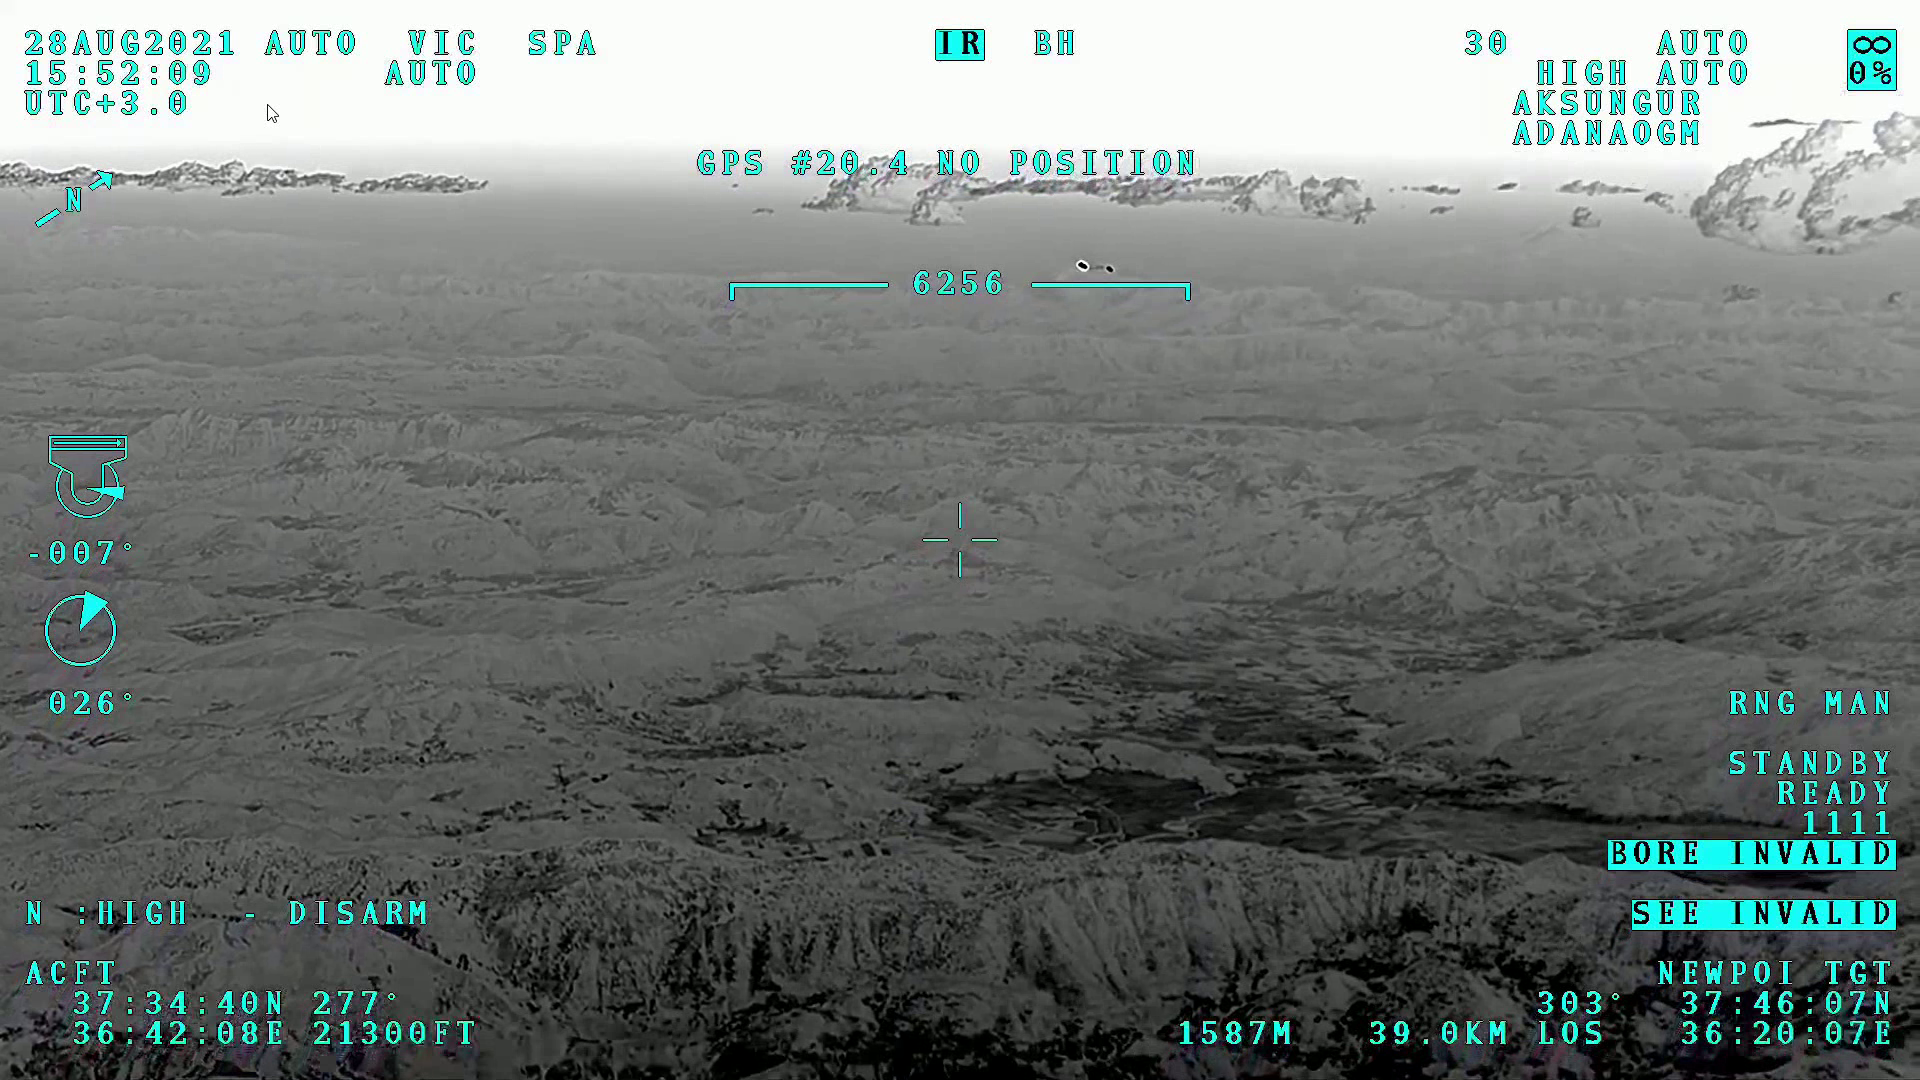

In [28]:
displayFromArray(testArray,limit=5)

In [30]:
def is_grayscale_strict(frame):
    """
    Check if a frame is grayscale by comparing color channels.

    Args:
        frame (np.ndarray): Image to check.

    Returns:
        bool: True if the image is grayscale, False otherwise.
    """
    if len(frame.shape) == 2:  # Grayscale image with one channel
        return True
    elif frame.shape[2] == 3:  # Color image with three channels
        # Check if all channels are identical
        return np.array_equal(frame[:, :, 0], frame[:, :, 1]) and np.array_equal(frame[:, :, 1], frame[:, :, 2])
    return False

In [33]:
is_grayscale_strict(testArray[1])

False

Step1 Detect if it is 